In [27]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 26 18:27:50 2019

@author: chabha idri
"""

'\nCreated on Sat Oct 26 18:27:50 2019\n\n@author: chabha idri\n'

In [16]:
import numpy as np
import random
from sklearn.metrics.pairwise import pairwise_distances
from matplotlib import pyplot as plt

In [25]:
def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C


In [19]:
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

D = pairwise_distances(data, metric='euclidean')
M, C =kMedoids(D, 2)

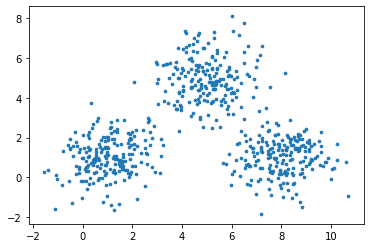

In [22]:
plt.scatter(data[:,0], data[:,1], s=7)
#plt.scatter(M[:,0], marker='*', c='r')

In [26]:
print('medoids:')
for point_idx in M:
    print( data[point_idx] )

print('')
print('clustering result:')
for label in C:
    for point_idx in C[label]:
        print('label {0}:　{1}'.format(label, data[point_idx]))



medoids:
[0.95289078 0.94649221]
[6.48672918 2.94885798]

clustering result:
label 0:　[ 0.28108958 -0.05198001]
label 0:　[1.96453407 1.61737361]
label 0:　[2.36135272 0.75282697]
label 0:　[3.17068425 1.06863322]
label 0:　[ 0.65290843 -0.05972866]
label 0:　[2.5742374  1.18802198]
label 0:　[0.25311578 1.37375015]
label 0:　[0.59774473 0.58395159]
label 0:　[1.2613737  1.06168387]
label 0:　[1.81623819 0.21074743]
label 0:　[0.85060018 0.29468823]
label 0:　[ 0.16433154 -0.58690228]
label 0:　[ 0.9731479  -0.96231694]
label 0:　[1.61526049 0.5729446 ]
label 0:　[0.93188027 0.23287678]
label 0:　[1.91729302 0.90398093]
label 0:　[-0.37015207  1.57485708]
label 0:　[0.96579546 0.75335409]
label 0:　[-1.01914041 -0.10695852]
label 0:　[-1.08215543  0.13764502]
label 0:　[0.03016627 2.14602703]
label 0:　[1.36823808 2.86770234]
label 0:　[1.29481527 0.19678523]
label 0:　[-1.1201815  -1.60838342]
label 0:　[-0.14024268  1.29228143]
label 0:　[1.45904309 0.81150259]
label 0:　[ 0.60693045 -0.11247958]
label 0:　[-0

In [ ]:
"""Kmedoid est meilleur que kmeans car le premier algorithme on peut l'utiliser
   avec n’importe quelle mesure de similarité.
   kmeans peut toutefois ne pas réussir à converger  
   l'algo doit être utilisée que sur des distances compatibles avec la moyenne
   L'inconvénient de kmedoid est la complexité,l'algo est trop cher """